In [ ]:
import math
#%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import json
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications.resnet_v2 import decode_predictions

In [ ]:
%cd /content/drive/MyDrive/cnn_embed

/content/drive/MyDrive/cnn_embed


In [ ]:
#DOWNLOADIR = '/content/drive/MyDrive/cnn_embed/imagewang_data'
BASEDIR = '/content/drive/MyDrive/cnn_embed/imagewang_tf_records/'
#imagenette =tfds.load('imagewang/full-size',  data_dir=BASEDIR, download=True,
#                                             download_and_prepare_kwargs= {'download_dir':DOWNLOADIR})
dataset, info = tfds.load(
    'imagewang/full-size',
    split='train[:100]',
    batch_size=40,
    data_dir=BASEDIR,
    with_info=True, 
    download=False)

In [ ]:
def preprocess_data(element):
  image = element['image']
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [224, 224])
  image = preprocess_input(image)
  return image

In [ ]:
image_data = dataset.map(lambda x: preprocess_data(x))

In [ ]:
for x in image_data:
  print(x.shape)

(40, 224, 224, 3)
(40, 224, 224, 3)
(20, 224, 224, 3)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
image_data = image_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.applications.ResNet50V2()
layer_outputs = [layer.output for layer in model.layers]
activations_map_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs[6])
layer_activations = activations_map_model.predict(image_data)

In [ ]:
layer_activations.shape

(100, 56, 56, 64)

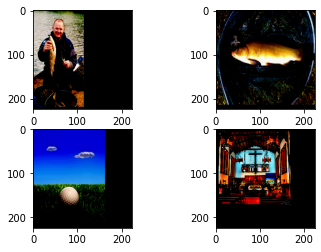

In [ ]:
for n in range(4):
  plt.subplot(2,2,n+1)
  plt.imshow(x['image'][n+8])

In [ ]:
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, layer_activations):
  print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


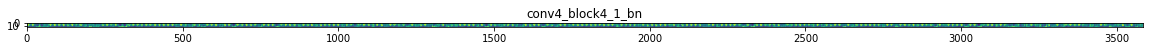

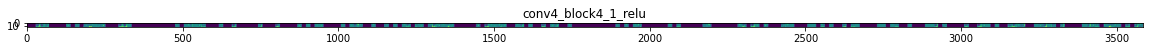

In [ ]:
layer_name_plot = layer_names[123:125]
feature_maps_plot = layer_activations[123:125]
for layer_name, feature_map in zip(layer_name_plot, feature_maps_plot):  
      k = feature_map.shape[-1]  
      size = feature_map.shape[1]
      image_belt = np.zeros((size, size*k))
      for i in range(k):
        feature_image = feature_map[0, :, :, i]
        feature_image-= feature_image.mean()
        feature_image/= feature_image.std ()
        feature_image*=  64
        feature_image+= 128
        feature_image= np.clip(feature_image, 0, 255).astype('uint8')
        image_belt[:, i * size : (i + 1) * size] = feature_image  
      scale = 20. / k
      plt.figure( figsize=(scale * k, scale) )
      plt.title ( layer_name )
      plt.grid  ( False )
      plt.imshow( image_belt, aspect='auto')